In [1]:
import sys
sys.path.append("../../")

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math 
from delay.sequencefinder import find

In [3]:
def calculateProbability(fA, fB, omega, d):
    return max(0, min(1, 0.5 + omega*(fA - fB)/(2*d)))

In [4]:
def fA(x, d):
    if x <= 0:
        return d
    if x < d:
        return d-x
    return 0

def fB(x, d):
    if x <= -d:
        return 0
    if x < 0:
        return d+x
    return d

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = 1
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA], d), fB(x[current - tauB], d)
        
        prob = calculateProbability(previousA, previousB, 1, d)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

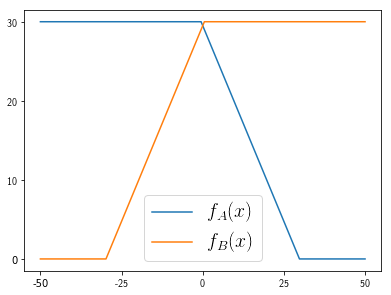

In [5]:
vfA = np.vectorize(fA)
vfB = np.vectorize(fB)

N = 100
plt.figure(figsize=(6.4, 4.8))
x = np.linspace(-N/2, N/2, num=100)

yA = vfA(x, 30)
yB = vfB(x, 30)


plt.plot(x, yA, label=r'$f_A(x)$')
plt.plot(x, yB, label=r'$f_B(x)$')
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

plt.legend()
plt.show()


In [6]:
print('|   ', end='')
for j in range(-2, 4):
    print('| %d ' % j, end='')
print('|\n' + '|---' * 6 + '|')
for j in range(-2, 4):
    print('| **%d** ' % j, end = '')
    for i in range(-2, 4):
        if abs(i-j) > 1 or i == j: 
            print('| x', end='')
            continue
        print(' | %.2f ' % calculateProbability(fA(i, 2), fB(j, 2), 1, 2), end='')
        # print(' | %d ' % (fA(i, 2) - fB(j, 2)), end='')
    print('|')

|   | -2 | -1 | 0 | 1 | 2 | 3 |
|---|---|---|---|---|---|
| **-2** | x | 1.00 | x| x| x| x|
| **-1**  | 0.75 | x | 0.75 | x| x| x|
| **0** | x | 0.50 | x | 0.25 | x| x|
| **1** | x| x | 0.50 | x | 0.00 | x|
| **2** | x| x| x | 0.25 | x | 0.00 |
| **3** | x| x| x| x | 0.00 | x|


µ =  0.0176395360081009


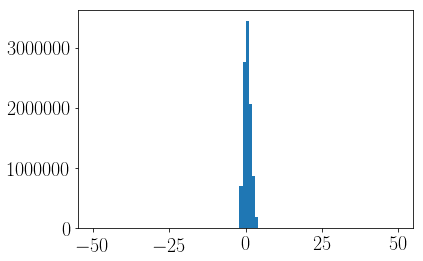

In [68]:
N = 100
tauA = 1
tauB = 0
d = 2
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()
            
plt.hist(x[8*N:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [6]:
N = 100
tauA = 2
tauB = 0
d = 2
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.04879077613890606


8/175 = 0.04571428571428571

In [11]:
np.histogram(x, [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

(array([ 912557, 2739371, 3104679, 1917747,  914217,  342883,   68549]),
 array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))

In [31]:
np.histogram(x, [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

(array([ 912910, 2739154, 3105374, 1918809,  913479,  342038,   68239]),
 array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))

In [12]:
np.array([ 912557, 2739371, 3104679, 1917747,  914217,  342883,   68549]) / 10000000

array([0.0912557, 0.2739371, 0.3104679, 0.1917747, 0.0914217, 0.0342883,
       0.0068549])

In [10]:
pi_2   = find(x, [-2])
pi_1_P = find(x, [-1, -2, -1])
pi_1P_ = find(x, [-1, 0, -1])
pi_1__ = find(x, [1, 0, -1])

In [9]:
print(pi_2, ' = ', pi_1_P/4 + pi_1P_/4 + pi_1__/2)

911804  =  913227.25


In [12]:
pi_1_P

911804

In [13]:
pi_1P_

913419

In [11]:
pi_1__

913843

In [9]:
N = 100
tauA = 2
tauB = 0
d = 1
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.07920938562280712


In [10]:
np.histogram(x, [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5])[0] / 10000000

array([0.0526219, 0.2630526, 0.3684186, 0.2106258, 0.0789597, 0.0263217])

In [6]:
N = 100
tauA = 2
tauB = 0
d = 2
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.04879077613890606


In [45]:
N = 100
tauA = 2
tauB = 0
d = 3
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.015855250493918772


In [46]:
N = 100
tauA = 2
tauB = 0
d = 4
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.0045915902127356715


In [47]:
N = 100
tauA = 2
tauB = 0
d = 5
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.0010776773540508446


In [48]:
N = 100
tauA = 2
tauB = 0
d = 6
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.0014360356047941126


In [49]:
N = 100
tauA = 2
tauB = 0
d = 7
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  -0.0030996987688592286


In [50]:
N = 100
tauA = 2
tauB = 0
d = 8
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.0011175171819267722


In [51]:
N = 100
tauA = 2
tauB = 0
d = 9
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()

print('µ = ', np.mean(x[100*conv:]))

µ =  0.0011259255878101337
